### import modules

In [1]:
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import seaborn as sns
%matplotlib inline

### import file

In [2]:
buildings = pd.read_csv('building_inventory.csv')
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


### data cleaning

In [3]:
# delete the 0 records since they will affect the resullt
new_buildings = buildings[(buildings['Year Acquired'] != 0) & (buildings['Year Constructed'] !=0) & (buildings['Square Footage'] != 0)]
new_buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018,2018,1455,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017,2017,6720,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN


In [4]:
# find distinct agency names and store them into a list
agency = new_buildings['Agency Name'].unique()
agency_new = agency.tolist()
agency_new

['Department of Natural Resources',
 'Department of Corrections',
 'Department of Human Services',
 'Department of Transportation',
 'Department of State Police',
 'Department of Military Affairs',
 'Department of Agriculture',
 'Governors State University',
 'Department of Central Management Services',
 'Illinois State University',
 'Historic Preservation Agency',
 'Department of Juvenile Justice',
 'Southern Illinois University',
 'Illinois Medical District Commission',
 'University of Illinois',
 "Department of Veterans' Affairs",
 'Chicago State University',
 'Northern Illinois University',
 'Office of the Secretary of State',
 'Illinois Emergency Management Agency',
 'Western Illinois University',
 'Eastern Illinois University',
 'Northeastern Illinois University',
 'Illinois Community College Board',
 'Illinois Board of Higher Education',
 'IL State Board of Education',
 'Department of Revenue',
 "Governor's Office",
 'Office of the Attorney General',
 'Appellate Court / Fourth D

In [5]:
total = new_buildings['Square Footage'].groupby([new_buildings['Congress Dist'], new_buildings['Agency Name'], new_buildings['Year Acquired']]).sum().reset_index(name="Total Square Footage")
total

,Congress Dist,Agency Name,Year Acquired,Total Square Footage
0,0,Department of Central Management Services,1855,3848
1,0,Department of Central Management Services,1968,18000
2,0,Department of Central Management Services,1974,208030
3,0,Department of Central Management Services,1977,1400
4,0,Department of Human Services,1952,900
...,...,...,...,...
2477,18,Western Illinois University,2006,400
2478,18,Western Illinois University,2007,9732
2479,18,Western Illinois University,2010,1200
2480,18,Western Illinois University,2014,1800


In [6]:
# since hist2d con only recgonize numerial variables, so I transform the agency name to distinct numbers
def set_index(x):
    if x in agency_new:
        return agency_new.index(x)

In [7]:
total.loc[:, 'Agency Number'] = total['Agency Name'].apply(set_index)
total

,Congress Dist,Agency Name,Year Acquired,Total Square Footage,Agency Number
0,0,Department of Central Management Services,1855,3848,8
1,0,Department of Central Management Services,1968,18000,8
2,0,Department of Central Management Services,1974,208030,8
3,0,Department of Central Management Services,1977,1400,8
4,0,Department of Human Services,1952,900,2
...,...,...,...,...,...
2477,18,Western Illinois University,2006,400,20
2478,18,Western Illinois University,2007,9732,20
2479,18,Western Illinois University,2010,1200,20
2480,18,Western Illinois University,2014,1800,20


In [8]:
total.dtypes  # find the type of Year Acquired

Congress Dist            int64
Agency Name             object
Year Acquired            int64
Total Square Footage     int64
Agency Number            int64
dtype: object

### create visualization

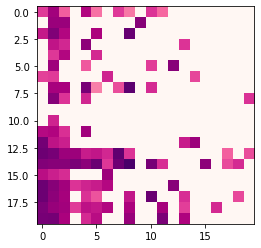

In [9]:
nlong = 20
nlat = 20

hist2d, x_edges, y_edges = np.histogram2d(total['Agency Number'], 
                                              total['Congress Dist'], 
                                              weights = total['Total Square Footage'], 
                                              bins=[nlong, nlat])
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [10]:
np.log10(hist2d).min()
np.log10(hist2d).max()

/Users/sophie9w9/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/sophie9w9/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


7.16712309964404

In [11]:
# set the "bad" values
hist2d[hist2d<= 0] = np.nan
hist2d = np.log10(hist2d)
np.nanmin(hist2d)

3.3736474722092176

In [12]:
# create label
mySelectedLabel = ipywidgets.Label()   # print out info about our selection

In [13]:
x_centers = (x_edges[: -1] + x_edges[1:]) / 2
y_centers = (y_edges[: -1] + y_edges[1:]) / 2

In [14]:
# create heatmap
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Agency Number')
y_ax = bqplot.Axis(scale=y_sc, label='Congress District', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=x_centers, 
                             column=y_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

bqplot.Figure(marks=[heat_map], axes=[x_ax, y_ax])

Figure(axes=[Axis(label='Agency Number', scale=LinearScale()), Axis(label='Congress District', orientation='ve…

In [15]:
# create line plot
# scales
import datetime as dt   # for formatting min/max in bqplot.DateScale
x_scl = bqplot.LinearScale(min=1850, max=2020)
y_scl = bqplot.LinearScale() 

# axis
ax_xcl = bqplot.Axis(label='Year Acquired', scale=x_scl) # dates
ax_ycl = bqplot.Axis(label='Total Square Footage', scale=y_scl, 
                    orientation='vertical', side='left')

# marks
i, j = 19, 0 
xs = [x_edges[i], x_edges[i+1]]
ys = [y_edges[j], y_edges[j+1]]
# set data in particular bins
region_mask = ( (total['Congress Dist'] >= xs[0]) & (total['Congress Dist'] <= xs[1]) &\
               (total['Agency Number'] >= ys[0]) & (total['Agency Number']<= ys[1]))


footage_year = bqplot.Lines(x=total['Year Acquired'], 
                               y=total['Total Square Footage'],
                               scales={'x':x_scl, 'y':y_scl})

bqplot.Figure(marks=[footage_year], axes=[ax_xcl, ax_ycl])

Figure(axes=[Axis(label='Year Acquired', scale=LinearScale(max=2020.0, min=1850.0)), Axis(label='Total Square …

In [16]:
# link heatmap with line plot
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        j,i = change['owner'].selected[0]
        v = hist2d[j,i]
        mySelectedLabel.value = 'Total Square Footage = ' + str(v)
        
        # upadate line plot
        xs = [x_edges[i], x_edges[i+1]]
        ys = [y_edges[j], y_edges[j+1]]
        # set dat in particular bins
        region_mask = ( (total['Congress Dist'] >= xs[0]) & (total['Congress Dist'] <= xs[1]) &\
                       (total['Agency Number'] >= ys[0]) & (total['Agency Number']<= ys[1]) )
        
        footage_year.x = total['Year Acquired'][region_mask]
        footage_year.y = total['Total Square Footage'][region_mask]
          
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

In [17]:
# create figure
fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig_line = bqplot.Figure(marks=[footage_year], axes=[ax_xcl, ax_ycl])

In [18]:
# put it all together 
fig_heatmap.layout.min_width='400px'
fig_line.layout.min_width = '400px'

plots = ipywidgets.HBox([fig_heatmap, fig_line])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard

I found that some of the color areas have relative line charts, but others can show nothing. I think this is because that agencies and districts have several recorded years and others only have one year record. So these areas only have one recorded year will show as a point. So nothing will be displayed on the line charts.

- Can you keep the x and y ranges static on the line plot?

Yes, we can keep the x and y ranges static on the line plot. I used bqplot.LinearScale(min=1850, max=2020) to limit the year range from 1850 to 2020 since the records before 1850 is too little and meaningless.

- Can you change the style?

Yes, we can change the style by changing the scheme from 'RdPu' to others.